In [124]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [125]:
train_raw = pd.read_csv('./dataset/titanic/train.csv')
test_raw = pd.read_csv('./dataset/titanic/test.csv')
main =[train_raw, test_raw]

In [126]:
print(train_raw.shape,'\n',test_raw.shape)

(891, 12) 
 (418, 11)


In [127]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
train_raw.isnull().sum().sort_values(ascending=False)/len(train_raw)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [129]:
train_raw.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [130]:
train_raw.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [131]:
train_raw.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [132]:
for df in main:
    df['FamilySize'] = df['SibSp'] + df['Parch']
train_raw.groupby(['FamilySize'])['Survived'].mean()

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [133]:
for df in main:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
train_raw.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [134]:
train_raw.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [135]:
# fill NaN in fare according to their Pclass
for df in main:
    df['Fare'] = df['Fare'].fillna(df.groupby(['Pclass'])['Fare'].transform('mean'))

In [136]:
# fill NaN in age according to their characteristics
for df in main:
    df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass', 'Embarked'])['Age'].transform('mean'))

In [137]:
print(train_raw['Name'][0], re.search('([A-Za-z]+)\.', train_raw['Name'][0]).group(1))

Braund, Mr. Owen Harris Mr


In [138]:
def extract_title(name):
    pattern = re.search('([A-Za-z]+)\.', name)
    
    if pattern:
        return pattern.group(1)
    else:
        return ""
    
for df in main:
    df['Title'] = df['Name'].apply(extract_title)
    
print(pd.crosstab(train_raw['Title'], train_raw['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [139]:
for df in main:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

train_raw.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [140]:
train_raw.isnull().sum().sort_values(ascending=False)

Cabin          687
Title            0
FamilySize       0
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [141]:
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train_raw = train_raw.drop(drop_elements, axis = 1)
test_raw = test_raw.drop(drop_elements, axis = 1)

In [142]:
train_raw.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,1,Mr
1,1,1,female,38.0,71.2833,C,1,Mrs
2,1,3,female,26.0,7.9250,S,0,Miss
3,1,1,female,35.0,53.1000,S,1,Mrs
4,0,3,male,35.0,8.0500,S,0,Mr


In [146]:
# LabelEncoder for multiple columns
from collections import defaultdict

d = defaultdict(LabelEncoder)

required_col = ['Sex', 'Embarked', 'Title']
train = train_raw.copy()
test = test_raw.copy()

train[required_col] = train[required_col].apply(lambda x: d[x.name].fit_transform(x))
test[required_col] = test[required_col].apply(lambda x: d[x.name].transform(x))

In [161]:
train = train.values
test  = test.values

In [162]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)

In [163]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

target_col = 'Survived' 
X = train[0::, 1::]
y = train[0::, 0]

In [165]:
acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

C:\Users\Chan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Chan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this wa

In [166]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

In [173]:
log = log.sort_values('Accuracy', ascending=False)

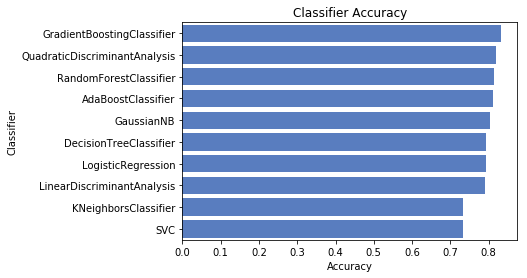

In [174]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [178]:
best_classifer = GradientBoostingClassifier()

In [179]:
best_classifer.fit(train[0::, 1::], train[0::, 0])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [180]:
result = best_classifer.predict(test)

In [185]:
test_id = pd.read_csv('./dataset/titanic/test.csv').PassengerId

In [199]:
result = pd.DataFrame(list(zip(test_id.values, result)), columns = ['PassengerId', 'Survived'])

In [200]:
result.to_csv('./result.csv', index = False)